In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
USTreasuryData =pd.read_csv("https://home.treasury.gov/resource-center/data-chart-center/interest-rates/daily-treasury-rates.csv/2025/all?type=daily_treasury_yield_curve&field_tdr_date_value=2025&page&_format=csv",index_col = 'Date')
USTreasuryData.index=pd.to_datetime(USTreasuryData.index)

In [11]:
# Assumes Day Count Convention: 30/360
dayCountMapping = {
    '1 Mo': 30,'2 Mo': 60, '3 Mo': 90, '4 Mo': 120, '6 Mo': 180,
    '1 Yr': 360, '2 Yr': 720, '3 Yr': 1080, '5 Yr': 1800,
    '7 Yr': 2520, '10 Yr': 3600, '20 Yr': 7200, '30 Yr': 10800
}

In [12]:
# Dynamic Class to Extract the data from US Treasury Official Website.
class InterestRates:
    def __init__(self,Y):
        self.Y = Y
    def USTreasury(self,ratesCurve=False,COBDate=None):
        USTreasuryData=pd.read_csv(f"https://home.treasury.gov/resource-center/data-chart-center/interest-rates/daily-treasury-rates.csv/{self.Y}/all?type=daily_treasury_yield_curve&field_tdr_date_value={self.Y}&page&_format=csv",index_col='Date')
        USTreasuryData.index = pd.to_datetime(USTreasuryData.index)

        if ratesCurve==True:
            if COBDate==None:
                return USTreasuryData[USTreasuryData.index==USTreasuryData.index.max()]
            else:
                return USTreasuryData[USTreasuryData.index==COBDate]
        else:
            return USTreasuryData
USTreasuryCurve = InterestRates(Y=2022).USTreasury(ratesCurve=True, COBDate=pd.to_datetime('2022-01-03'))
USTreasuryCurve_=pd.DataFrame(data=USTreasuryCurve.values,index=USTreasuryCurve.index,columns=dayCountMapping.values())
USTreasuryCurve_

,30,60,90,120,180,360,720,1080,1800,2520,3600,7200,10800
Date,,,,,,,,,,,,,
2022-01-03,0.05,0.06,0.08,NaN,0.22,0.4,0.78,1.04,1.37,1.55,1.63,2.05,2.01


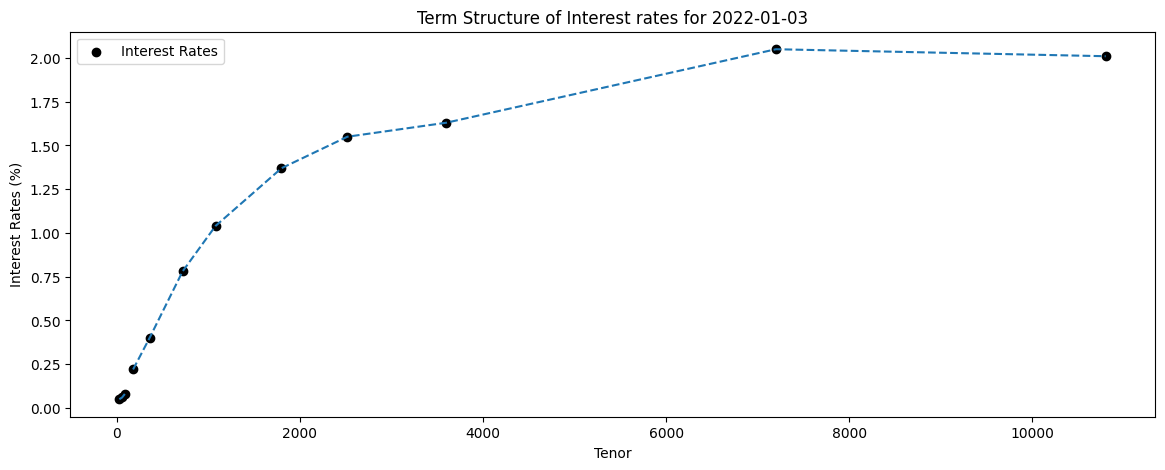

In [13]:
plt.figure(figsize=(14,5))
plt.scatter(x=USTreasuryCurve_.columns,y=USTreasuryCurve_.values,color='k',label='Interest Rates')
plt.plot(USTreasuryCurve_.transpose(),linestyle='--')
plt.title(f'Term Structure of Interest rates for {USTreasuryCurve_.index[0].date()}')
plt.xlabel('Tenor')
plt.ylabel('Interest Rates (%)')
plt.legend()
plt.show()

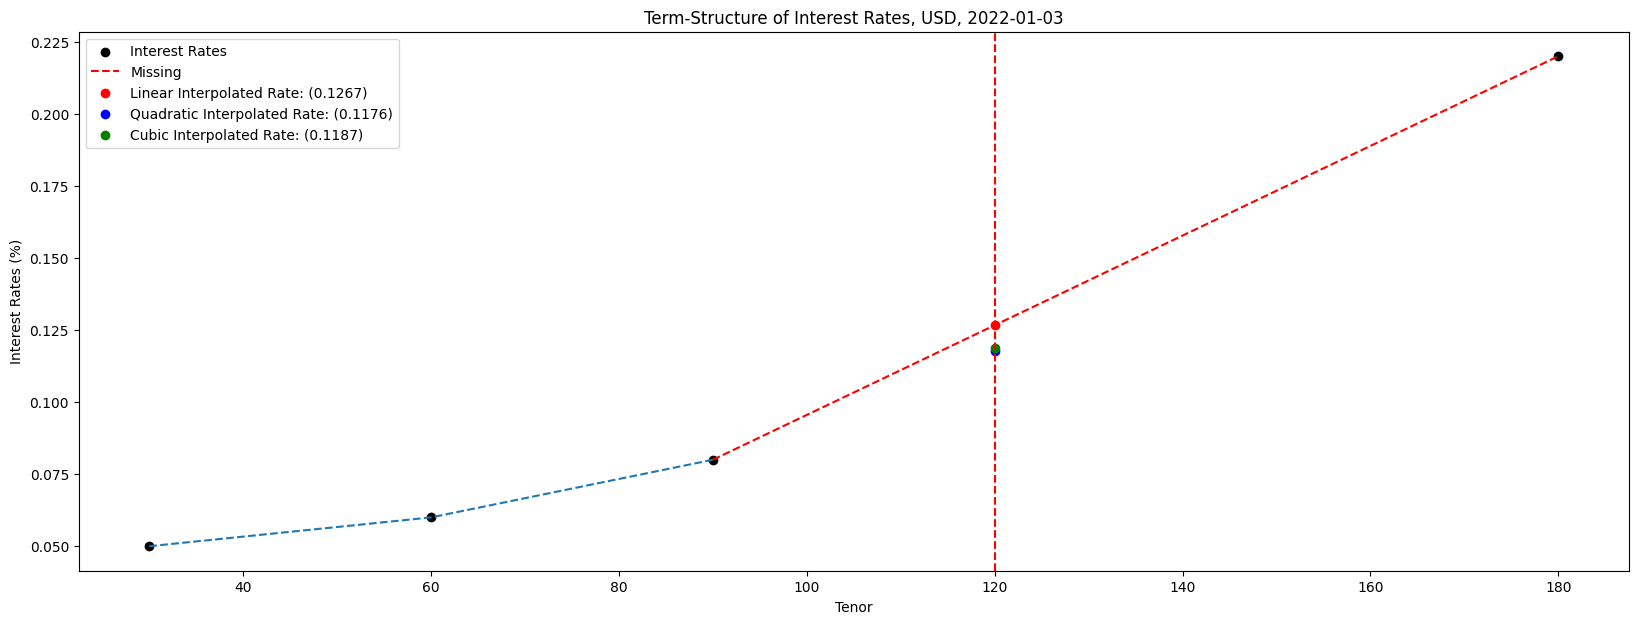

In [14]:
USTreasuryCurve_f = USTreasuryCurve_.iloc[:, 0:5]

plt.figure(figsize=(20, 7))
plt.scatter(x=USTreasuryCurve_f.columns, y=USTreasuryCurve_f.values, color='k', label='Interest Rates')
plt.plot(USTreasuryCurve_f.transpose(), linestyle='--')

plt.axvline(120, color='r', linestyle='--', label='Missing')
plt.plot([90, 180], [0.08, 0.22], color='r', linestyle='--')
# plt.plot([30, 180], [0.05, 0.22], color='grey', linestyle='--')

interpolatedRate = USTreasuryCurve_.interpolate(method='index', axis='columns', limit=2, limit_direction='both', order=1)[120].values[0]
plt.scatter(x=120, y=interpolatedRate, color='r', label=f'Linear Interpolated Rate: ({round(interpolatedRate, 4)})')

interpolatedRate = USTreasuryCurve_.interpolate(method='polynomial', axis='columns', limit=2, limit_direction='both', order=2)[120].values[0]
plt.scatter(x=120, y=interpolatedRate, color='b', label=f'Quadratic Interpolated Rate: ({round(interpolatedRate, 4)})')

interpolatedRate = USTreasuryCurve_.interpolate(method='polynomial', axis='columns', limit=3, limit_direction='both', order=3)[120].values[0]
plt.scatter(x=120, y=interpolatedRate, color='g', label=f'Cubic Interpolated Rate: ({round(interpolatedRate, 4)})')

plt.title(f'Term-Structure of Interest Rates, USD, {USTreasuryCurve_.index[0].date()}')
plt.xlabel('Tenor')
plt.ylabel('Interest Rates (%)')
plt.legend()
plt.show()


Text(0, 0.5, 'Interest Rates (%)')

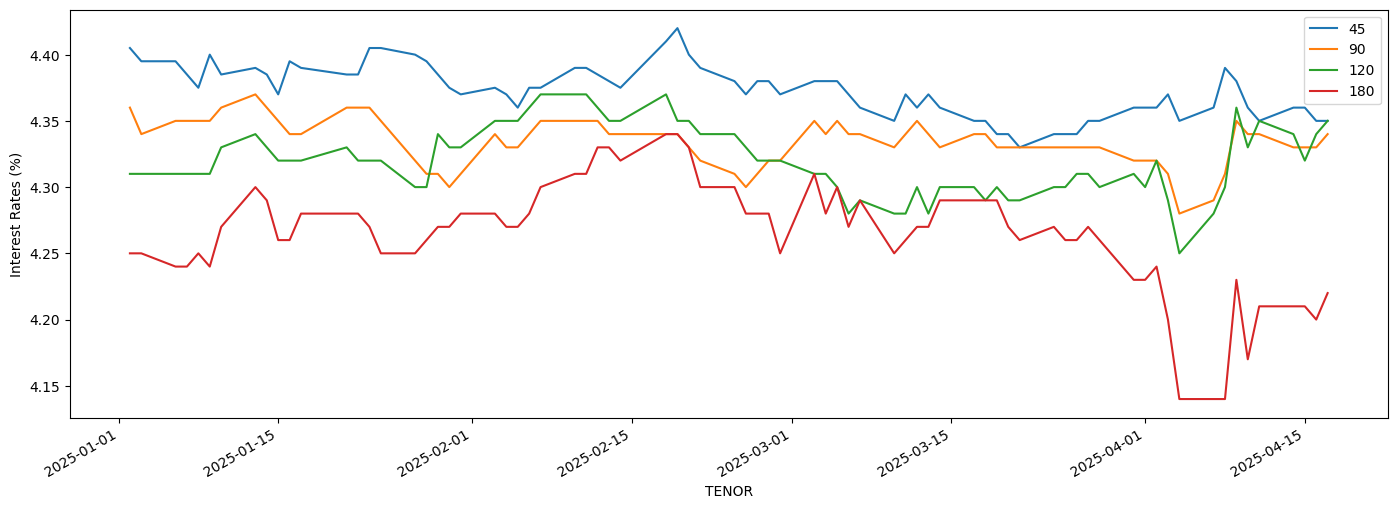

In [17]:
# US Treasury Started Publishing data of 1.5 Months.
dayCountMapping = {
    '1 Mo': 30, '1.5':45,'2 Mo': 60, '3 Mo': 90, '4 Mo': 120, '6 Mo': 180,
    '1 Yr': 360, '2 Yr': 720, '3 Yr': 1080, '5 Yr': 1800,
    '7 Yr': 2520, '10 Yr': 3600, '20 Yr': 7200,'30 Yr': 10800
}

# LINEAR INTERPOLATION TIME SERIES OF TERM STRUCTURE OF US TREASURY RATES FOR THE YEAR 2025
USTreasuryData = InterestRates(Y=2025).USTreasury()
USTreasuryData_=pd.DataFrame(data=USTreasuryData.values,index=USTreasuryData.index, columns=dayCountMapping.values())
USTreasuryData_[[15,1440,2160,14400,18000]]=np.nan
USTreasuryData_=USTreasuryData_[USTreasuryData_.columns.sort_values()]
USTreasuryData_.interpolate(method='index',axis='columns',limit=1, limit_direction='both')
USTreasuryData_.interpolate(method='index',axis='columns',limit=2, limit_direction='both')[[45,90,120,180]].plot(legend=True,figsize=(17,6))
plt.xlabel('TENOR')
plt.ylabel('Interest Rates (%)')


Text(0, 0.5, 'Interest Rates (%)')

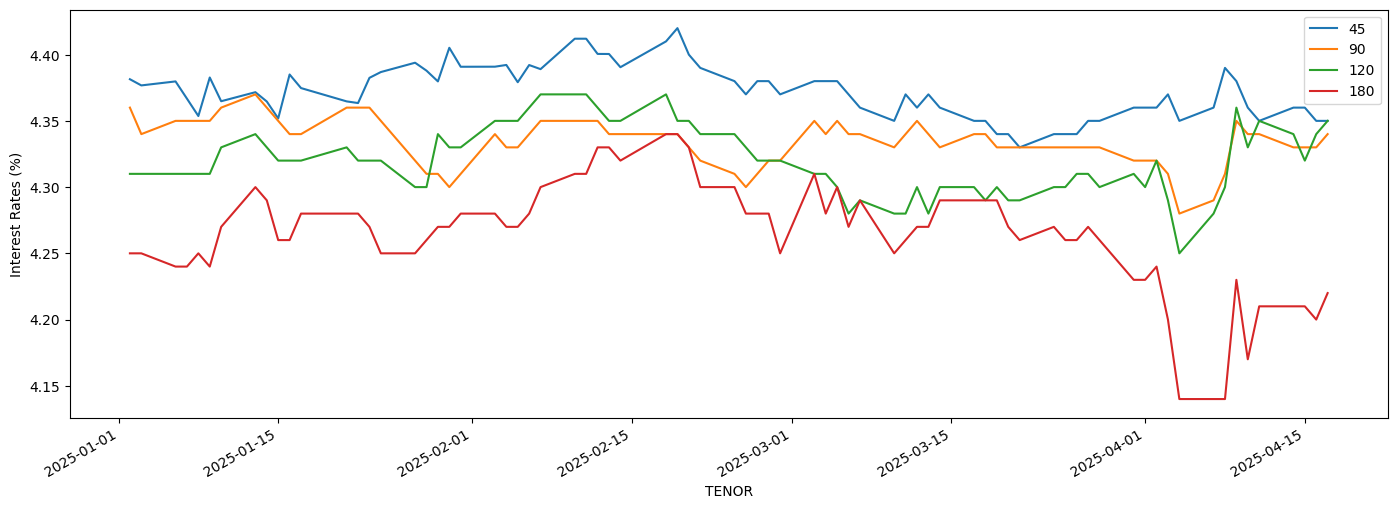

In [18]:
# POLYNOMIAL INTERPOLATION TIME SERIES OF TERM STRUCTURE OF US TREASURY RATES FOR THE YEAR 2025
USTreasuryData = InterestRates(Y=2025).USTreasury()
USTreasuryData_=pd.DataFrame(data=USTreasuryData.values,index=USTreasuryData.index, columns=dayCountMapping.values())
USTreasuryData_[[15,1440,2160,14400,18000]]=np.nan
USTreasuryData_=USTreasuryData_[USTreasuryData_.columns.sort_values()]
USTreasuryData_.interpolate(method='polynomial',axis='columns',limit=1, limit_direction='both',order=3)
USTreasuryData_.interpolate(method='polynomial',axis='columns',limit=1, limit_direction='both',order=3)[[45,90,120,180]].plot(legend=True,figsize=(17,6))
plt.xlabel('TENOR')
plt.ylabel('Interest Rates (%)')
